In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
!pip install --upgrade albumentations
!git clone https://github.com/frgfm/torch-cam.git
!pip install -e torch-cam/.

     |████████████████████████████████| 102 kB 7.1 MB/s 
     |████████████████████████████████| 47.6 MB 123 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
Cloning into 'torch-cam'...
remote: Enumerating objects: 4219, done.
remote: Counting objects: 100% (1765/1765), done.
remote: Compressing objects: 100% (857/857), done.
remote: Total 4219 (delta 1220), reused 1389 (delta 902), pack-reused 2454
Receiving objects: 100% (4219/4219), 8.58 MiB | 22.36 MiB/s, done.
Resolving deltas: 100% (2850/2850), done.
Obtaining file:///content/torch-cam
     |████████████████████████████████| 3.1 MB 5.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Running setup.py develop for torchcam


In [2]:
! git clone https://github.com/eva7wandb/Weights_Heist_Flow.git

Cloning into 'Weights_Heist_Flow'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
Unpacking objects: 100% (18/18), done.
remote: Total 18 (delta 3), reused 15 (delta 3), pack-reused 0


In [11]:
%cd /content/Weights_Heist_Flow

/content/Weights_Heist_Flow


In [12]:
!pwd

/content/Weights_Heist_Flow


In [25]:
from main import Trainer, show_misclassification, show_loss_curves
from models import resnet

In [26]:
trainer = Trainer(
    resnet.ResNet18()
)

[INFO] Loading Data


/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:691: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
[INFO] train dataset of size 50000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32] 

In [27]:
trainer.train_model(epochs=2)

[INFO] Begin training for 2 epochs


TRAIN Epoch:0 Loss:1.1034 Batch:390 Acc:46.82: 100%|██████████| 391/391 [02:25<00:00,  2.69it/s]


TEST         Loss:0.0093         Acc:59.07         [5907 / 10000]


TRAIN Epoch:1 Loss:0.7469 Batch:390 Acc:64.17: 100%|██████████| 391/391 [02:25<00:00,  2.68it/s]


TEST         Loss:0.0074         Acc:67.96         [6796 / 10000]


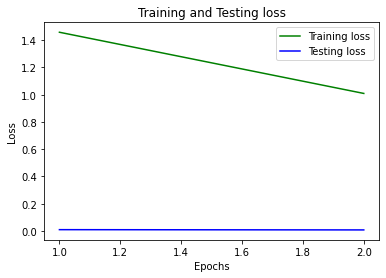

In [28]:
show_loss_curves(trainer.logs)

[INFO] device :  cuda


Generating sample predictions: 79it [00:10,  7.88it/s]


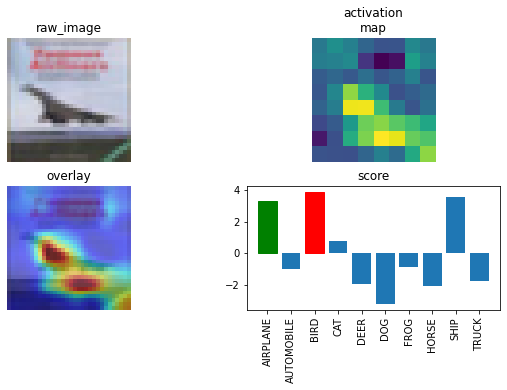

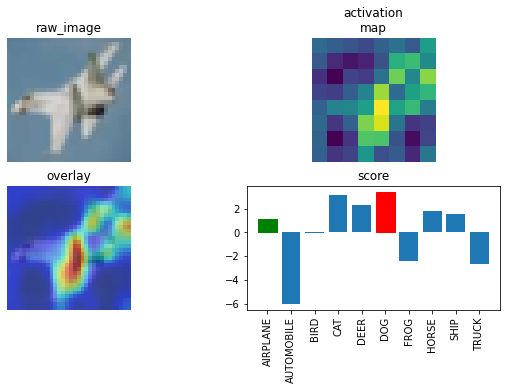

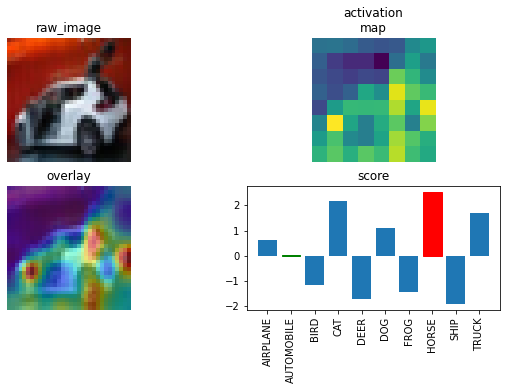

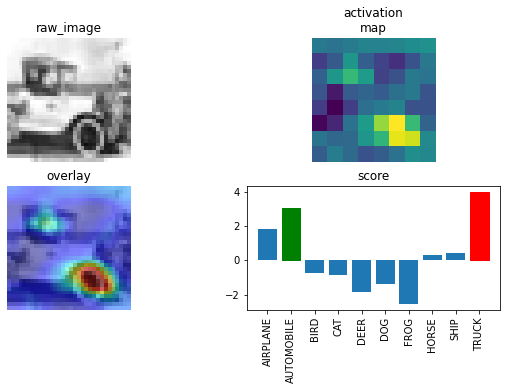

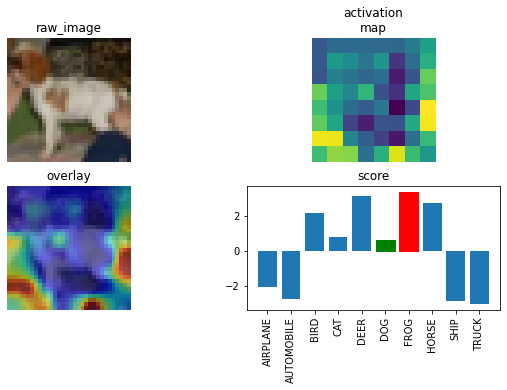

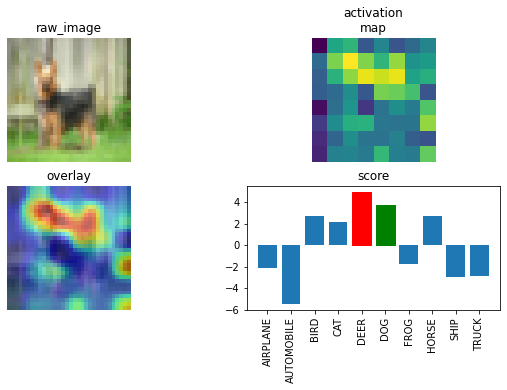

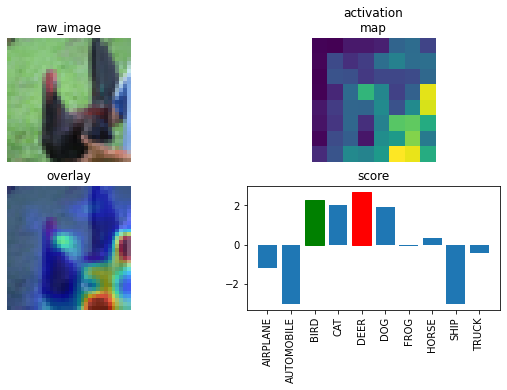

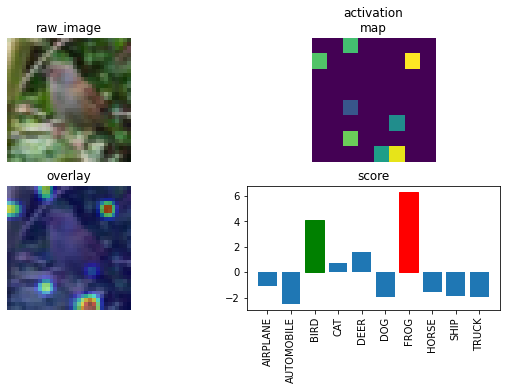

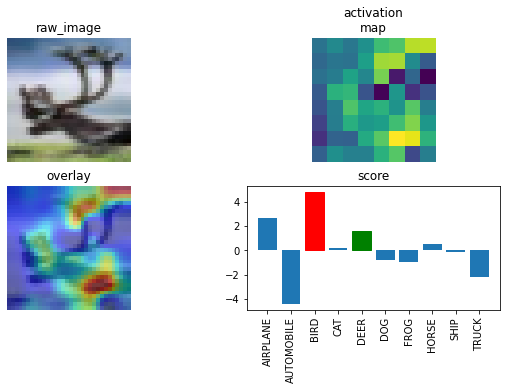

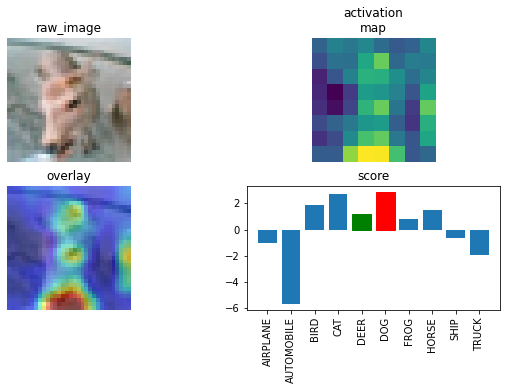

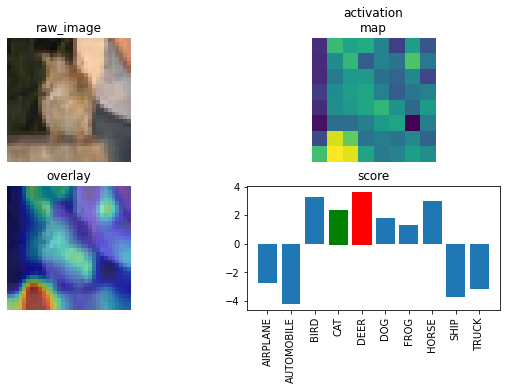

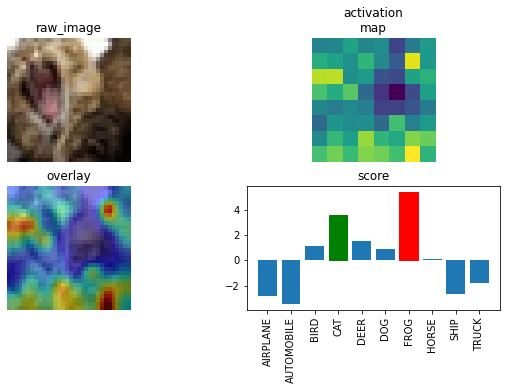

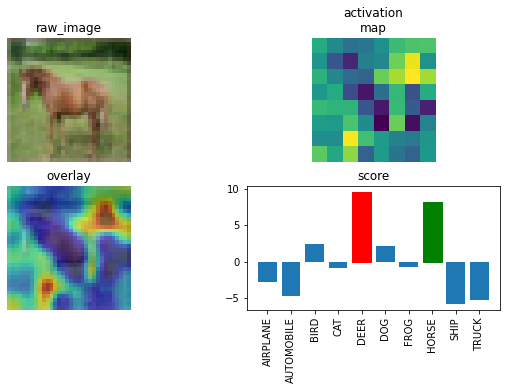

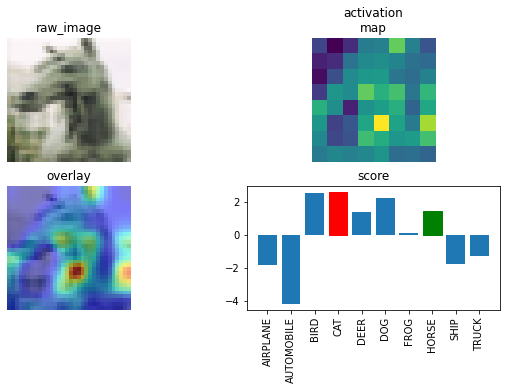

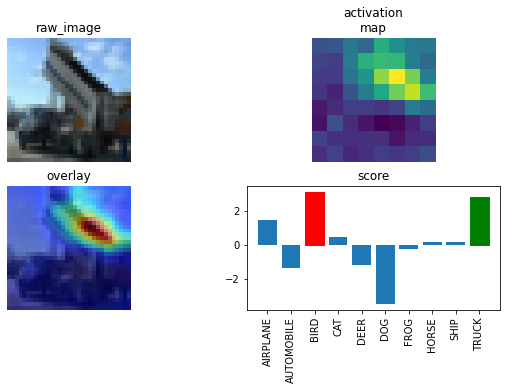

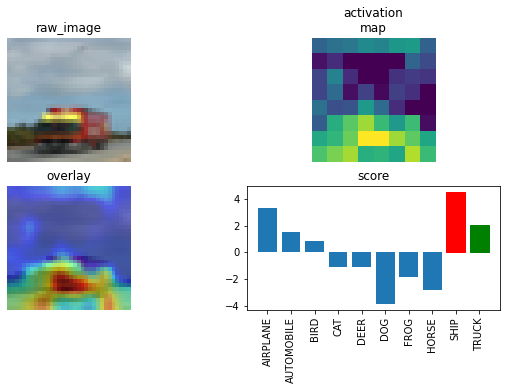

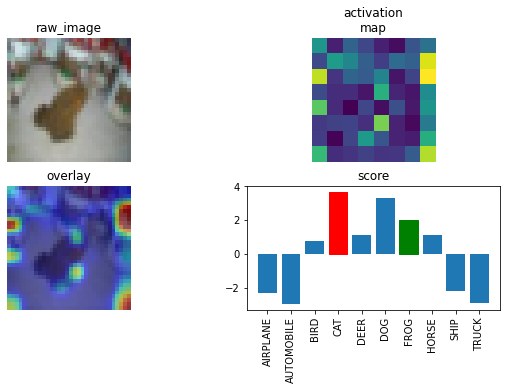

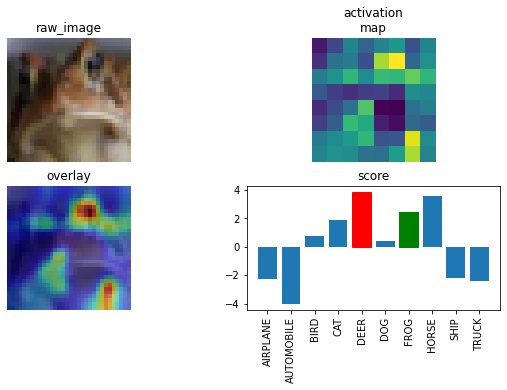

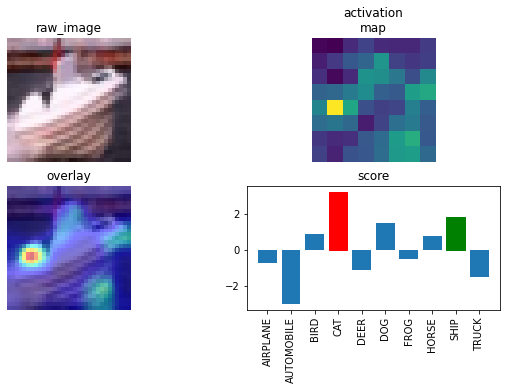

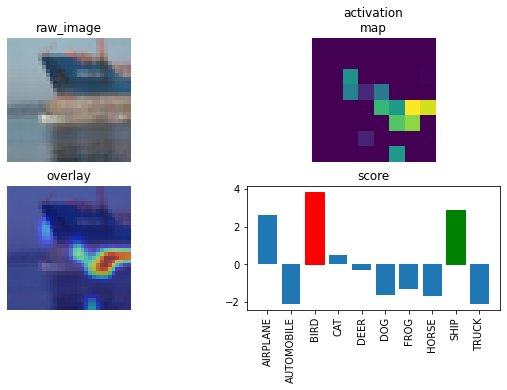

In [29]:
show_misclassification(trainer, 'layer3')